Predicting Salaries with Decision Trees
=======================================


Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree


In [2]:
attribute_names = (
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'salary-class',
)


Read a CSV data file.

In [3]:
data= pd.read_csv("D:/coursera decision tree/adult.data", 
                  names= attribute_names)


In [4]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Pre-process the data.  First, remove unwanted variables.

In [5]:
excludes = (
    'fnlwgt', 
    'education-num',
    'capital-gain', 
    'capital-loss'
)
for att in excludes:
    del data[att]
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


Boolean variables to 0s and 1s.

In [7]:
temp_data=('sex','native-country','salary-class')
for att in temp_data:
    data[att]= data[att].astype('category')
    data[att]= data[att].cat.codes
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,39,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,39,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,39,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,39,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,5,0


 One-hot encoding of all categorical attributes.

In [8]:
categoricals = (
    'workclass', 
    'education', 
    'marital-status', 
    'occupation', 
    'relationship', 
    'race'
)


In [9]:
encoded_variable = pd.get_dummies(data[['education', 'workclass','marital-status','occupation','relationship', 'race']])

In [10]:
data=pd.concat([data,encoded_variable], axis=1)
data= data.drop(['education', 'workclass','marital-status','occupation','relationship', 'race'], axis=1)
data

,age,sex,hours-per-week,native-country,salary-class,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,1,40,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,1,13,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,1,40,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,1,40,39,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,38,39,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
32557,40,1,40,39,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,0,40,39,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,22,1,20,39,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [17]:
#Another way of one hot encoding, this way, we don't need to concat and drop variables.
#data = pd.get_dummies(data, columns=['education', 'workclass','marital-status','occupation','relationship', 'race'])

In [18]:
#second way of one_way_hotencoding
#import category_encoders as ce
#ce_OHE = ce.OneHotEncoder(cols=['education', 'workclass','marital-status','occupation','relationship', 'race'])
#data1 = ce_OHE.fit_transform(data)
#data1.head()


In [19]:
data.columns

Index(['age', 'sex', 'hours-per-week', 'native-country', 'salary-class',
       'education_ 10th', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ ?

In [20]:
#from IPython.display import display, HTML
#numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#cols_numeric = data.select_dtypes(include=numerics).columns.tolist()
#print('Selected numerical columns:\n',cols_numeric)    
#for col in cols_numeric:
    #data[col]=(data[col]-data[col].min())/(data[col].max()-data[col].min())

#display(HTML(data.head(10).to_html()))

In [21]:
data

,age,sex,hours-per-week,native-country,salary-class,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,1,40,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,1,13,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,1,40,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,1,40,39,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,38,39,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
32557,40,1,40,39,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,0,40,39,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,22,1,20,39,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Extract attributes (X) and class labels (y).

In [22]:
y=data['salary-class']

In [23]:
X=data.copy()
X=X.drop(['salary-class'],axis=1)

In [24]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary-class, Length: 32561, dtype: int8

Split dataset into training and testing subsets.

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=0)


In [35]:
print('X.train', X_train.shape)
print('X.test', X_test.shape)
print('y.train', y_train.shape)
print('y.test', y_test.shape)

X.train (21815, 62)
X.test (10746, 62)
y.train (21815,)
y.test (10746,)


Construct a decision tree from this training data.

In [36]:
clf= DecisionTreeClassifier(random_state=0, criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predict target class for the training set.

In [37]:
y_train_pred= clf.predict(X_train)
print(y_train_pred[0:10])
train_acc= accuracy_score(y_train, y_train_pred)
print("Train:", train_acc)

[0 0 0 1 0 0 0 0 0 0]
Train: 0.974925509970204


Predict target class for the testing set.

In [38]:
y_test_pred= clf.predict(X_test)
print(y_test_pred[0:10])
test_acc= accuracy_score(y_test, y_test_pred)
print("test:", test_acc)

[1 1 0 1 0 0 0 0 0 0]
test: 0.7761957937837335


Check if dataset is balanced.

In [42]:
data['salary-class'].value_counts()

0    24720
1     7841
Name: salary-class, dtype: int64

Prune the decision tree.

min_samples_splits: 2
Train: 0.974925509970204
test: 0.7761957937837335
min_samples_splits: 3
Train: 0.9617694247077699
test: 0.7793597617718221
min_samples_splits: 5
Train: 0.9475131790052717
test: 0.7808486878838637
min_samples_splits: 10
Train: 0.9197341278936512
test: 0.7882933184440722
min_samples_splits: 20
Train: 0.8968141187256475
test: 0.7917364600781687
min_samples_splits: 30
Train: 0.8845748338299335
test: 0.800856132514424
min_samples_splits: 50
Train: 0.8705936282374513
test: 0.808393820956635
min_samples_splits: 100
Train: 0.8579417831767133
test: 0.8172343197468825
min_samples_splits: 200
Train: 0.8476736190694476
test: 0.824678950307091
min_samples_splits: 250
Train: 0.843777217510887
test: 0.8252372975991067
min_samples_splits: 500
Train: 0.8395599358239744
test: 0.8245858924250884
min_samples_splits: 1000
Train: 0.8293376117350447
test: 0.8210496929089894
min_samples_splits: 2500
Train: 0.8260829704331881
test: 0.8201191140889633
min_samples_splits: 5000
Train: 0.8212

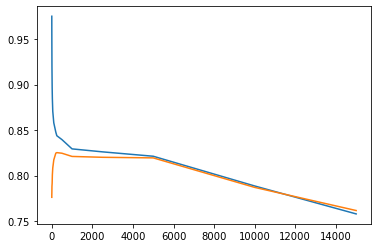

In [49]:
sizes= [2,3,5,10,20,30,50,100,200,250,500,1000,2500, 5000, 10000, 15000]
train_accs=[]
test_accs=[]

for s in sizes:
    clf= DecisionTreeClassifier(
         random_state=0, 
         criterion='entropy', 
         min_samples_split=s
    )
    clf.fit(X_train,y_train)
    
    print("min_samples_splits:", s)
    y_train_pred= clf.predict(X_train)
    train_acc= accuracy_score(y_train, y_train_pred)
    print("Train:", train_acc)
    y_test_pred= clf.predict(X_test)
    test_acc= accuracy_score(y_test, y_test_pred)
    print("test:", test_acc)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
plt.plot(sizes,train_accs)
plt.plot(sizes, test_accs)
plt.show()

Graphical representation of a decision tree.

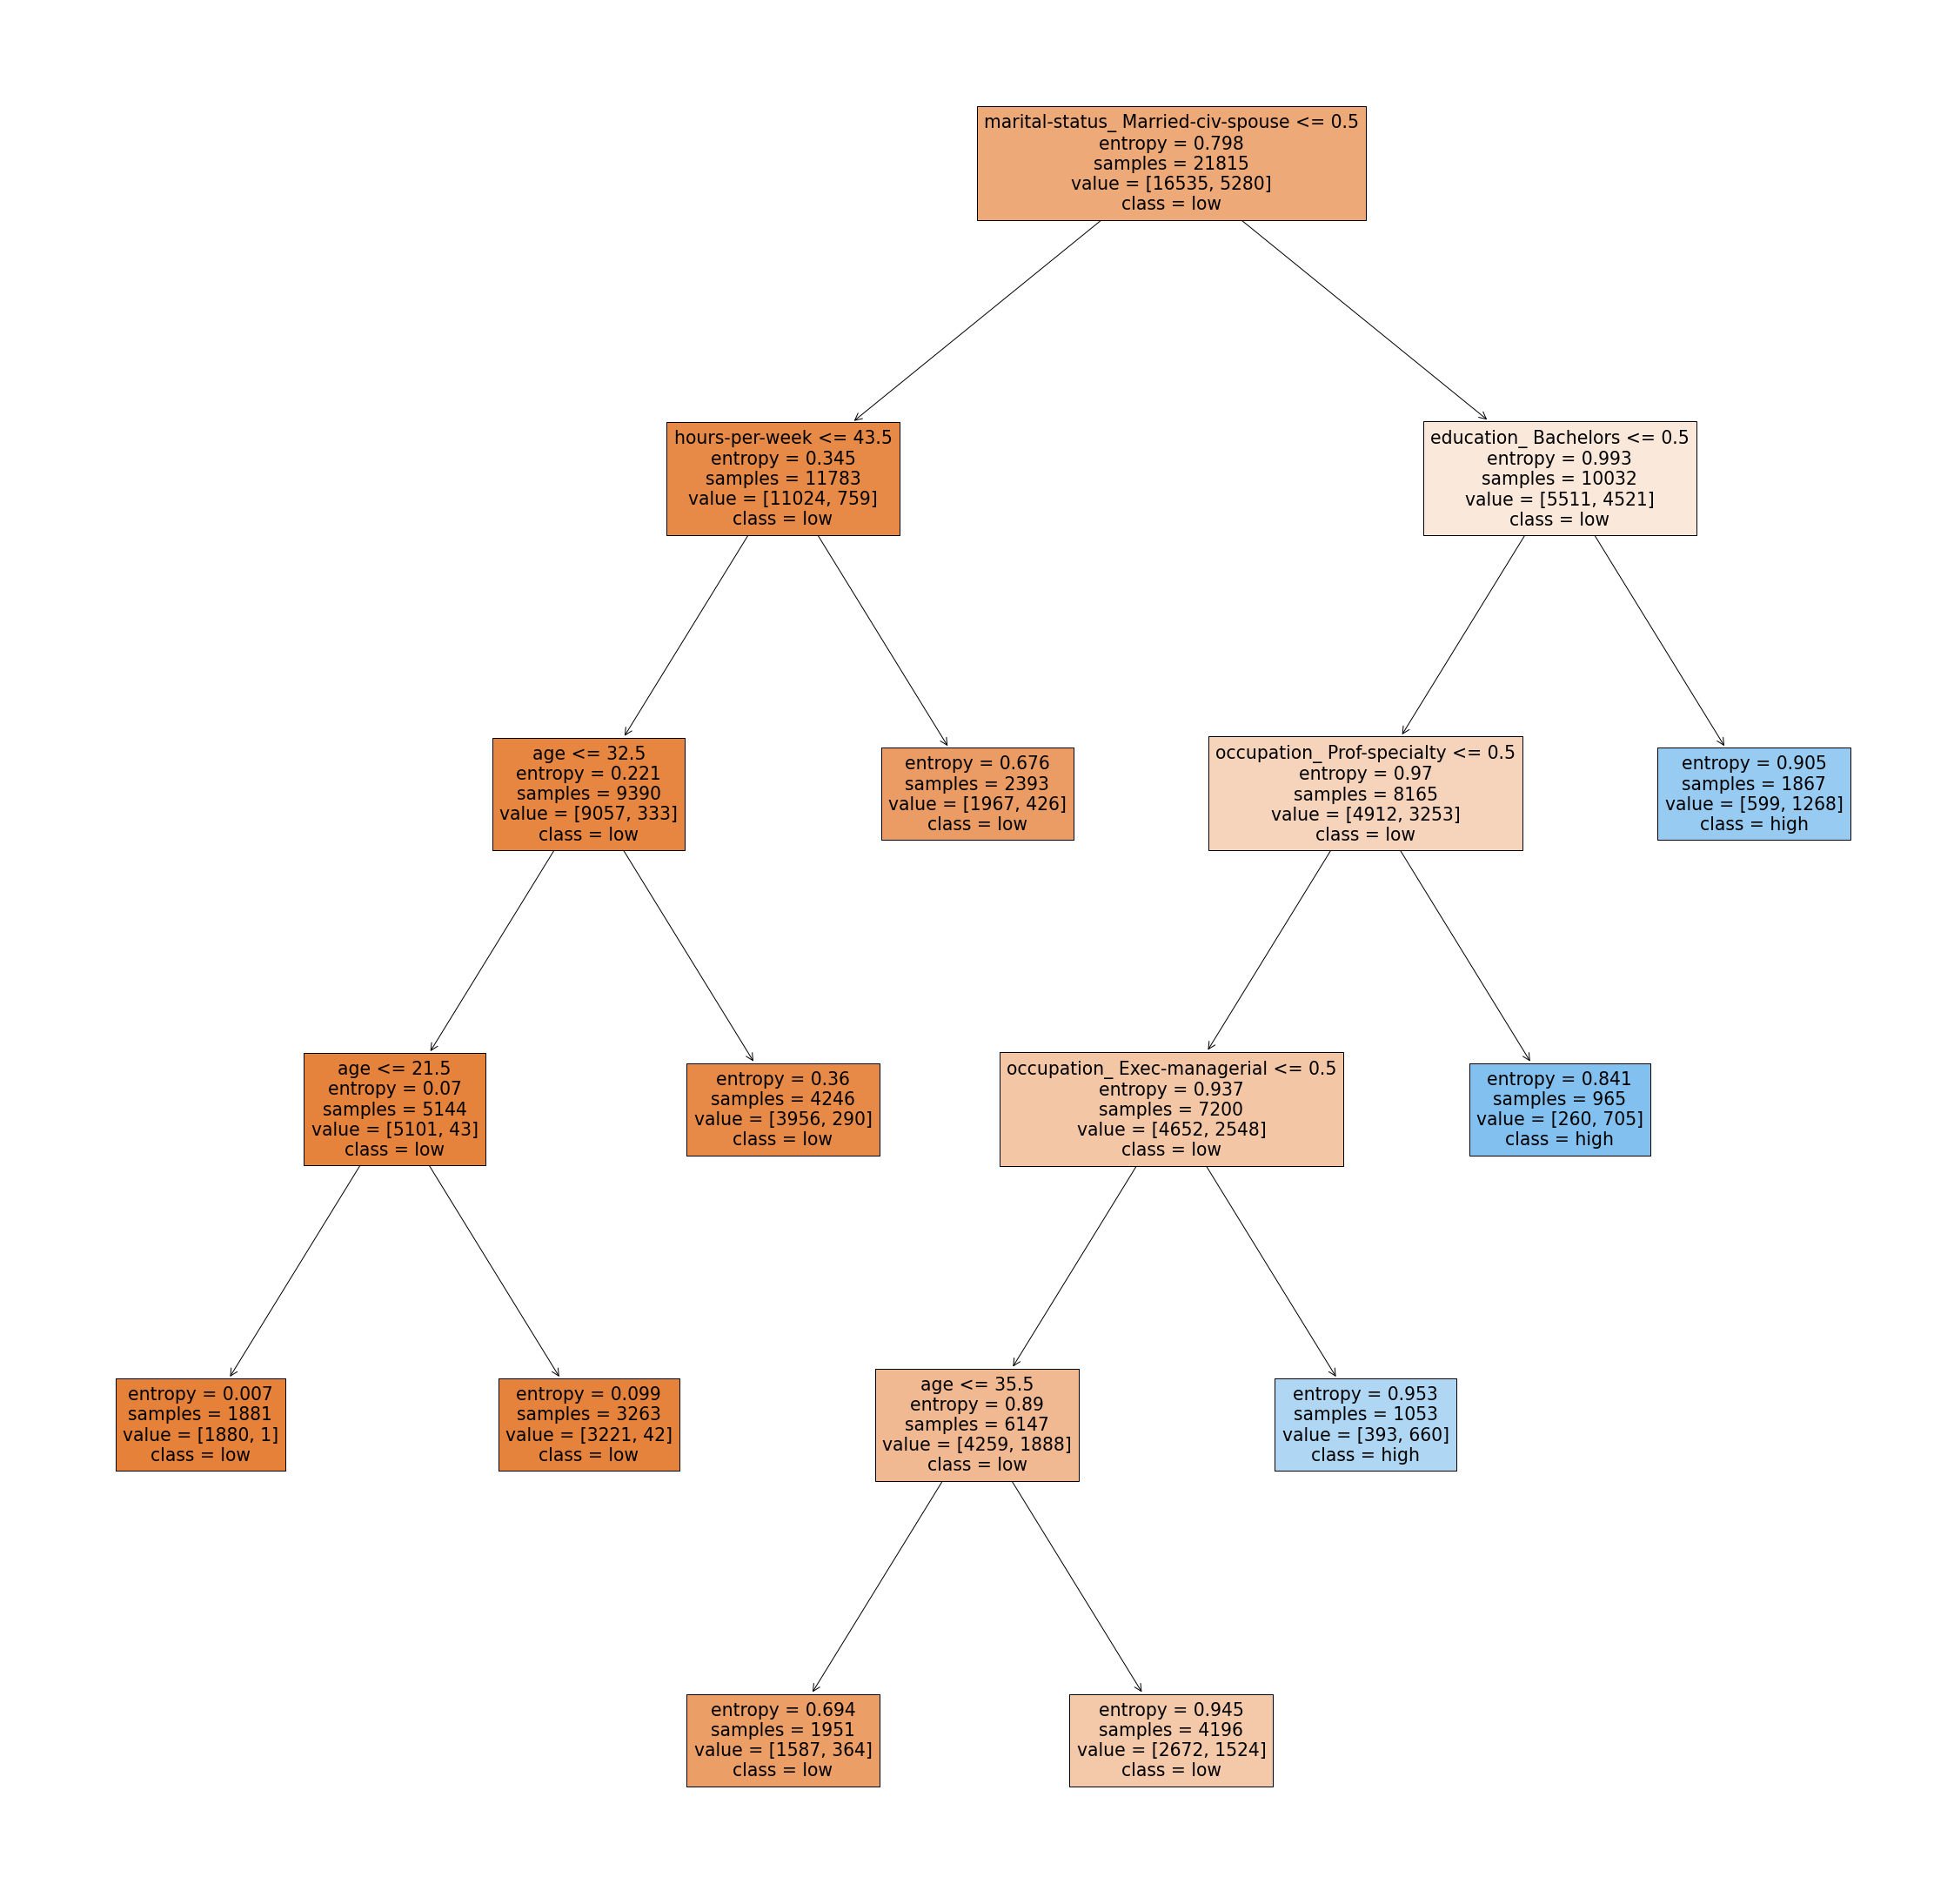

In [59]:
clf= DecisionTreeClassifier(
         random_state=0, 
         criterion='entropy', 
         min_samples_split=5000
    )
clf.fit(X_train,y_train)
fig=plt.figure(figsize=(40,40))
p = tree.plot_tree(
    clf,
    filled=True, 
    feature_names=X_train.columns.to_list(),
    class_names=("low","high"))
fig.savefig('tree.png')

               




## Thank you !!